## Chatbot Application with Local LLM, RAG, LangChain, NIVIDIA AI API, and Guardrail

I've developed a chatbot application designed for informative and engaging conversationAs you already aware that Retrieval-augmented generation (RAG) is a technique that combines information retrieval with a set of carefully designed system prompts to provide more accurate, up-to-date, and contextually relevant responses from large language models (LLMs). By incorporating data from various sources such as relational databases, unstructured document repositories, internet data streams, and media news feeds, RAG can significantly improve the value of generative AI systems.

Developers must consider a variety of factors when building a RAG pipeline: from LLM response benchmarking to selecting the right chunk size. 

In tapplication demopost, I demonstrate how to build a RAG pipeline uslocal LLM which can be converted to ing NVIDIA AI Endpoints for LangChain. FirI have you crdeate a vector storeconnecting with one of the Hugging Face dataset though we can  by downding web p or can use any pdf etc easily.aThen and generating their embeddings using SentenceTransformer or you can use the NVIDIA NeMo Retriever embedding microservice and searching for similarity using FAISS. I then showcase two different chat chains for querying the vector store. For this example, I use local LangChain chain and a Python FastAPI based REST API services which is running in different thread within the Jupyter Notebook environment itself. At last I have preapred a small but beautiful front end with HTML, Bootstrap and Ajax as a Chat Bot front end to interact by users. However you can use the NVIDIA Triton Inference Server documentation, though the code can be easily modified to use any other soueok.



**Introducing ChoiatBot Local CoPilot: Your Customizable Local Copilot Agent**

ChoiatBot offers a revolutionary approach to personalized chatbot solutions, developed to operate entirely on CPU-based systems without the need for an internet connection. This ensures not only enhanced privacy but also unrestricted accessibility, making it ideal for environments where data security is paramount.

**Key Features and Capabilities**

ChoiatBot stands out with its ability to be seamlessly integrated with diverse datasets, allowing users to upload and train the bot with their own data and documents. This customization empowers businesses and individuals alike to tailor the bot's responses to specific needs, ensuring a truly personalized user experience.

Powered by the google/flan-t5-small model, ChoiatBot leverages state-of-the-art technology known for its robust performance across various benchmarks. This model's impressive few-shot learning capabilities, as evidenced by achievements like 75.2% on the five-shot MMLU benchmark, ensure that ChoiatBot delivers accurate and contextually relevant responses even with minimal training data.

The foundation of ChoiatBot's intelligence lies in its training on the "Wizard-of-Wikipedia" dataset, renowned for its groundbreaking approach to knowledge-grounded conversation generation. This dataset not only enriches the bot's understanding but also enhances its ability to provide nuanced and informative responses based on a broad spectrum of topics.

**Performance and Security**

One of ChoiatBot's standout features is its ability to function offline, offering unparalleled data security and privacy. This capability is particularly advantageous for sectors dealing with sensitive information or operating in environments with limited internet connectivity. By eliminating reliance on external servers, ChoiatBot ensures that sensitive data remains within the user's control, adhering to the strictest security protocols.

Moreover, ChoiatBot's implementation on CPU-based systems underscores its efficiency and accessibility. This approach not only reduces operational costs associated with cloud-based solutions but also enhances reliability by mitigating risks related to internet disruptions or server downtimes.

**Applications and Use Cases**

ChoiatBot caters to a wide array of applications, from customer support automation to educational tools and personalized assistants. Businesses can integrate ChoiatBot into their customer service frameworks to provide instant responses and streamline communication channels. Educational institutions can leverage ChoiatBot to create interactive learning environments where students can receive tailored explanations and guidance.

For developers and data scientists, ChoiatBot offers a versatile platform for experimenting with different datasets and fine-tuning models. The provided code, along with detailed documentation on usage, encourages innovation and facilitates the adaptation of advanced AI capabilities to specific project requirements.

**Conclusion**

In conclusion, ChoiatBot represents a leap forward in AI-driven conversational agents, combining cutting-edge technology with a commitment to user privacy and customization. Whether you are looking to enhance customer interactions, optimize educational experiences, or explore the frontiers of AI research, ChoiatBot stands ready as your reliable local copilot agent, empowering you to harness the full potential of AI in your endeavors. Discover ChoiatBot today and unlock a new era of intelligent, personalized interactions tailored to your unique needs and aspirations.s:

* **Development Environment:**
    * Operating System: Windows 10 (widely used and compatible)
    * Hardware: CPU (no NVIDIA GPU required, making it accessible to a broader audience)
* **Language Model:**
    * Local LLM (Large Language Model): This provides the core conversational caUsed Google Flan 5 small LLM.f using a CPU)
    * Hugging Face Dataset: You've leveraged a small dataset from Hugging Face, a valuable resource for pre-trained models and datasets. This enables you to fine-tune the LLM for your specific purposes.
* **Data Processing and Training:**
    * LagChain (if applicable): If you're using LagChain, it likely facilitates data processing and training pipelines for your LLM, streamlining the development process.
* **Guardrails (Optional):**
    * NVIDIA Nemo Guardrail Library (if applicable): While Guardrail is typically used with NVIDIA GPUs, it's possible you might be employing a CPU-compatible version or alternative library for safety and bias mitigation.

**Key Features:**

* **Dataset Agnostic:** This chatbot can be trained on various datasets, allowing you to customize its responses based on your specific domain or requirements.
* **General Knowledge Base:** The initial training with a small Wikipedia dataset provides a solid foundation for general knowledge and information retrieval.
* **High Accuracy:** You've achieved impressive accuracy in responses, suggesting effective training and data selection.
* **Good Quality Responses:** The chatbot delivers informative and well-structured answers, enhancing user experience and satisfaction.

**Additional Considerations:**

* **Fine-Tuning Dataset:** Consider exploring domain-specific datasets from Hugging Face or other sources to further enhance the chatbot's expertise in your chosen area.
* **Active Learning:** If you're looking for continuous learning and improvement, investigate active learning techniques where the chatbot can identify informative data points to refine its responses.
* **User Interface:** While this response focuses on the backend, a well-designed user interface (text-based, graphical, or voice) can significantly improve ushatbot application's capabilities!

**Install the required libraries**

You need to uncomment and run them

In [1]:
# !pip install "unstructured[pdf]"
# !pip install nltk
# !pip install pymilvus
# !pip install langchain torch transformers faiss-cpu pypdf sentence-transformers langchain_nvidia_trt 
# !pip install tqdm spacy datasets langchain_text_splitters langchain-chroma langchain-huggingface llama-index
# !pip install amazon-codewhisperer-jupyterlab-ext
# !pip install faiss-cpu
# !pip install fastapi[all] pydantic
# !pip install uvicorn gunicorn
# !pip install langchain_nvidia_ai_endpoints

# !jupyter server extension enable amazon_codewhisperer_jupyterlab_ext

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Is GPU available for TensorFlow?", tf.test.is_gpu_available())

  Using cached unstructured-0.17.2-py3-none-any.whl.metadata (24 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached python_iso639-2025.2.18-py3-none-any.whl.metadata (14 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py) ... done
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached unstructured_client-0.36.0-py3-none-any.whl.metadata (21 kB)
  Using cached python_oxmsg-0.0.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached pdfminer_s

2025-06-22 18:20:08.582498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-22 18:20:08.688356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-22 18:20:08.688377: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-06-22 18:20:08.716062: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

**Import required libraries**

In [2]:
import glob
import os
import pickle
import re
import time
import textwrap
import umap
from tqdm import tqdm

import faiss
import matplotlib.pyplot as plt

# from llama_index.core.tools import QueryEngineTool
import numpy as np
import pandas as pd
import seaborn as sns
import openai
from datasets import load_dataset, load_from_disk
from dotenv import load_dotenv
from huggingface_hub import hf_hub_download
from langchain.document_loaders import PyPDFLoader
from langchain_community.document_loaders import UnstructuredHTMLLoader
from langchain.prompts import PromptTemplate
from langchain.schema import AIMessage, Document, HumanMessage, SystemMessage
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
from langchain.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_huggingface import HuggingFaceEmbeddings, HuggingFacePipeline
from langchain.chains import ConversationalRetrievalChain, LLMChain, RetrievalQA
from langchain.chains.conversational_retrieval.prompts import CONDENSE_QUESTION_PROMPT, QA_PROMPT
from langchain.chains.question_answering import load_qa_chain
from langchain.memory import ConversationBufferMemory
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings

# from llama_index.core import PromptTemplate, prompts, Prompt, PromptHelper
from llama_index.core import ServiceContext, set_global_service_context
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

load_dotenv()


/home/dhiraj-patra/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
# By default, load_dotenv() looks for a .env file in the current directory
# or searches upwards in the directory tree.
load_dotenv()

# Access your API key
nvidia_api_key = os.environ.get("NVIDIA_API_KEY")

if nvidia_api_key:
    print("NVIDIA API key loaded successfully.")
    client = openai.OpenAI(
        base_url = "https://integrate.api.nvidia.com/v1",
        api_key = nvidia_api_key
    )
    print(client)
else:
    print("Error: NVIDIA_API_KEY environment variable not found. Make sure your .env file is correctly set up.")

NVIDIA API key loaded successfully.


**You can use NVIDIA Triton Tensor Server as well**

In [4]:
# # to run your onw Nvidia Triton Tensor server
# from langchain_nvidia_trt.llms import TritonTensorRTLLM

# # Connect to the TRT-LLM Llama-2 model running on the Triton server at the url below
# # Replace "llm" with the url of the system where llama2 is hosted
# triton_url = "llm:8001"
# pload = {
#             'tokens':500,
#             'server_url': triton_url,
#             'model_name': "ensemble"
# }
# llm = TritonTensorRTLLM(**pload)

**Create a .env file and put all secret details**

In [5]:
HUGGING_FACE_API_KEY = os.getenv("HUGGING_FACE_WRITE_API_KEY")

**You can use your own document for your customize local Bot or CoPilot**

In [6]:
# download your own document
! wget -O "llama2_paper.pdf" -nc --user-agent="Mozilla" https://arxiv.org/pdf/2307.09288.pdf

File ‘llama2_paper.pdf’ already there; not retrieving.


In [7]:
# You can upload your own documents as well
# pdfLoader = PyPDFLoader("Large_language_model.pdf")
# documents = pdfLoader.load()
# or
from langchain.document_loaders import UnstructuredFileLoader
loader = UnstructuredFileLoader("llama2_paper.pdf")
data = loader.load()

/tmp/ipykernel_4021/208116616.py:6: LangChainDeprecationWarning: The class `UnstructuredFileLoader` was deprecated in LangChain 0.2.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-unstructured package and should be used instead. To use it run `pip install -U :class:`~langchain-unstructured` and import as `from :class:`~langchain_unstructured import UnstructuredLoader``.
  loader = UnstructuredFileLoader("llama2_paper.pdf")


**Using demo dataset from Hugging Face. You can use your own to train with RAG for your customize solution**

I have used a general purposes dataset for my demo. You need to use the specific dataset which require for your business or purposes.

In [12]:
# Data Processing (assuming these are already imported elsewhere or you need them here)
import os
import shutil # For removing directories

# Model Development (assuming these are already imported elsewhere)
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# import xgboost as xgb
# import lightgbm as lgb

# Deep Learning (assuming these are already imported elsewhere)
# import torch
# import tensorflow as tf
from datasets import load_dataset, load_from_disk # Essential for this code
# from transformers import AutoModel, AutoTokenizer

# Visualization (assuming these are already imported elsewhere)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

import textwrap # For textwrap.shorten

# Local dataset path where the dataset will be saved
# Using a relative path makes it writable in your current working directory.
local_dataset_path = "wizard_of_wikipedia_dataset/"

# --- FIX START ---
# Ensure any previous, possibly corrupted, partial download is cleared
if os.path.exists(local_dataset_path):
    print(f"Detected existing directory at '{local_dataset_path}'. Attempting to clear...")
    try:
        shutil.rmtree(local_dataset_path)
        print("Successfully removed existing partial dataset directory.")
    except Exception as e:
        print(f"Warning: Could not remove existing directory '{local_dataset_path}'. Error: {e}")
        print("Please ensure you have permissions to delete it or delete it manually if download continues to fail.")

# Check if the directory exists, create it if not
# This will now create it clean if it was just removed, or if it never existed.
if not os.path.exists(local_dataset_path):
    print(f"Creating wizard dataset folder at '{local_dataset_path}'")
    os.makedirs(local_dataset_path, exist_ok=True) # Create all necessary subdirectories
else:
    print(f"Wizard dataset folder '{local_dataset_path}' already exists.")

# --- FIX END ---


def download_and_save_dataset():
    """Downloads and saves the dataset if not already present."""
    try:
        # Check if dataset is downloaded before fetching
        if is_dataset_downloaded(local_dataset_path):
            print("Dataset already downloaded, skipping download.")
            return load_local_dataset()  # Load from local disk directly
        else:
            print("Dataset not found locally or incomplete, attempting to download...")
            # Download the dataset if not found locally
            # Added force_download=True as an option for persistent issues,
            # though deleting the folder first is usually enough.
            dataset = load_dataset(
                "chujiezheng/wizard_of_wikipedia",
                split="train",
                cache_dir=local_dataset_path,
                # force_download=True # Uncomment this line if you still face persistent partial download errors
            )
            dataset.save_to_disk(local_dataset_path)
            print("Dataset downloaded and saved successfully.")
            return dataset
    except Exception as e:
        print(f"Failed to download and save the dataset: {e}")
        return None


def is_dataset_downloaded(dataset_path):
    """Checks if the dataset is downloaded by verifying expected files and minimum file count."""
    # The 'datasets' library's structure can vary slightly.
    # A more robust check for a saved dataset is to see if a 'data-00000-of-XXXXX.arrow' file exists.
    # However, for simplicity and common usage, checking for 'dataset_info.json' and a 'data' subdir often suffices.

    # Check for the existence of the main directory and required files/subdirectories
    if not os.path.exists(dataset_path) or not os.path.isdir(dataset_path):
        return False

    # A good indicator of a successfully saved Hugging Face dataset is the presence of an 'arrow' file
    # and the 'dataset_info.json'.
    has_info_json = os.path.exists(os.path.join(dataset_path, "dataset_info.json"))

    # Check for at least one .arrow file (which stores the actual data)
    has_arrow_data = any(f.endswith(".arrow") for f in os.listdir(dataset_path))

    # Older 'datasets' versions might put things in a 'data' subfolder or similar.
    # The `load_from_disk` function itself is the ultimate check.
    # For robust check, you might want to call `load_from_disk` directly in this function,
    # but for preventing re-downloads, checking for key files is more efficient.

    if has_info_json and has_arrow_data:
        print(f"Detected 'dataset_info.json' and .arrow files in '{dataset_path}'.")
        return True
    else:
        # If files are missing, it's not downloaded or is corrupted.
        print(f"Missing 'dataset_info.json' or .arrow files in '{dataset_path}'.")
        return False


def load_local_dataset():
    """Loads the dataset from the local cache."""
    try:
        dataset = load_from_disk(local_dataset_path)
        print("Dataset loaded successfully from disk.")
        return dataset
    except Exception as e:
        print(f"Failed to load dataset from disk: {e}")
        return None


# Check if the folder exists (already done in the beginning)

# Check if dataset is downloaded or load from disk
dataset = download_and_save_dataset()

# Print dataset information if loaded
if dataset:
    import textwrap # Make sure textwrap is imported if used here

    print("\n--- Dataset Information ---")
    print(textwrap.shorten(str(dataset[:1]), width=200, placeholder="..."))
    print(f"Column Names: {dataset.column_names}")
    print(f"Dataset Shape: {dataset.shape}")
    # dataset.info might not be directly callable as a function, it's typically an attribute
    # if it's a Hugging Face Dataset object.
    # If it fails, you might need to adjust based on the actual object type.
    # print(f"Dataset Info: {dataset.info}") # This line might cause an error depending on the 'dataset' object's structure

    # Assuming 'dataset' is your Hugging Face Dataset
    dataset_features = dataset.features
    # Print feature types for each column
    print("\nFeature Types:")
    for feature_name, feature in dataset_features.items():
        print(f"{feature_name}: {feature.dtype}")

else:
    print("Dataset could not be loaded.")

Detected existing directory at 'wizard_of_wikipedia_dataset/'. Attempting to clear...
Successfully removed existing partial dataset directory.
Creating wizard dataset folder at 'wizard_of_wikipedia_dataset/'
Missing 'dataset_info.json' or .arrow files in 'wizard_of_wikipedia_dataset/'.
Dataset not found locally or incomplete, attempting to download...


Saving the dataset (2/2 shards): 100%|████████████████████████████████████████████| 18430/18430 [00:00<00:00, 28031.88 examples/s]

Dataset downloaded and saved successfully.

--- Dataset Information ---
{'post': [['Science fiction', "I'm a huge fan of science fiction myself! ", 'I agree. One of my favorite forms of science fiction is anything related to time travel! I find it fascinating.', "And...
Column Names: ['post', 'knowledge', 'labels', 'response', 'topics']
Dataset Shape: (18430, 5)

Feature Types:
post: list
knowledge: list
labels: list
response: list
topics: list


In [13]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [14]:
# Define the columns to remove from the dataset
remove_cols = ["knowledge", "labels", "topics"]
desired_columns = [col for col in dataset.column_names if col not in remove_cols]

# Create a subset with the desired columns and only the first 18430 rows
subset_data = [
    {col: example[col] for col in desired_columns}
    for example in dataset.select(range(18430))
]

# Convert each row to a Document object
documents = []
for example in subset_data:
    page_content = " ".join([f"{key}: {value}" for key, value in example.items()])
    documents.append(Document(page_content=remove_punctuation(page_content)))

# Print information about the documents
print(len(documents))  # Print the number of documents
print(documents[0])  # Print the first document for inspection
print(type(documents))  # Should be a list of Document objects
print(type(documents[0]))

18430
page_content='post Science fiction Im a huge fan of science fiction myself  I agree One of my favorite forms of science fiction is anything related to time travel I find it fascinating And thats difficult to do when dealing with time travel I actually havent seen the latest Harry Potter movies Guess its time to check them out response I think science fiction is an amazing genre for anything Future science technology time travel FTL travel theyre all such interesting concepts Awesome I really love how scifi storytellers focus on politicalsocialphilosophical issues that would still be around even in the future Makes them relatable Its not quite scifi but my favorite version of time travel is in Harry Potter and the Prisoner of Azkaban Breaks zero logical rules If you really want a look at the potential negative consequences of scientific innovation what you should check out is the TV show Fringe Incredibly well written'
<class 'list'>
<class 'langchain_core.documents.base.Document'

In [15]:
# Split the text into manageble chunk for embedding
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=150)
# docs = text_splitter.split_documents(documents)
# print(docs[:2])

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=512,
    chunk_overlap=0
)
docs = character_splitter.split_documents(documents)

print(docs[:2])
print(f"\nTotal chunks: {len(docs)}")

[Document(metadata={}, page_content='post Science fiction Im a huge fan of science fiction myself  I agree One of my favorite forms of science fiction is anything related to time travel I find it fascinating And thats difficult to do when dealing with time travel I actually havent seen the latest Harry Potter movies Guess its time to check them out response I think science fiction is an amazing genre for anything Future science technology time travel FTL travel theyre all such interesting concepts Awesome I really love how scifi storytellers'), Document(metadata={}, page_content='focus on politicalsocialphilosophical issues that would still be around even in the future Makes them relatable Its not quite scifi but my favorite version of time travel is in Harry Potter and the Prisoner of Azkaban Breaks zero logical rules If you really want a look at the potential negative consequences of scientific innovation what you should check out is the TV show Fringe Incredibly well written')]

Tot

In [24]:
# Initialize token splitter
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256)

token_split_texts = []
for doc in docs:
    # Convert each chunk into the expected format
    split_chunks = token_splitter.split_text(doc.page_content)
    for chunk in split_chunks:
        token_split_texts.append({"page_content": chunk})

# Print the shortened text of the 10th chunk and the total number of chunks
print(textwrap.shorten(token_split_texts[10]["page_content"], width=200))
print(f"\nTotal chunks: {len(token_split_texts)}")

allele on chromosome 16 is present

Total chunks: 33588


In [31]:
# Step 2: Create embeddings for the documents
model_path = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": False}

# Define file paths
index_file_path = "nvidia_llm_agent_faiss_index.bin"
metadata_file_path = "nvidia_llm_agent_metadata.pkl"

# Recreate the HuggingFaceEmbeddings object
embeddings = HuggingFaceEmbeddings(
    model_name=model_path, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

# Step 3: Create a FAISS vector store from the documents and embeddings
# Check if the FAISS index and metadata files exist
if os.path.isfile(index_file_path) and os.path.isfile(metadata_file_path):
    print("Loading existing FAISS index and metadata...")

    # Load the FAISS index from the file
    faiss_index = faiss.read_index(index_file_path)

    # Load the metadata and embeddings
    with open(metadata_file_path, "rb") as f:
        metadata = pickle.load(f)

    docs = metadata["docs"]
    index_to_docstore_id = metadata["index_to_docstore_id"]

    # Recreate the document store
    docstore = InMemoryDocstore(docs)

    # Recreate the FAISS vector store
    db = FAISS(
        embedding_function=embeddings.embed_query,
        index=faiss_index,
        docstore=docstore,
        index_to_docstore_id=index_to_docstore_id,
    )

    print("FAISS index and metadata loaded successfully.")
else:
    print("Creating new FAISS index and saving metadata...")

    # Assuming `docs` and `embeddings` are already defined before this step
    db = FAISS.from_documents(docs, embeddings)

    # Save the FAISS index to a file
    faiss.write_index(db.index, index_file_path)

    # Save the document store and index_to_docstore_id
    docstore = db.docstore
    index_to_docstore_id = db.index_to_docstore_id

    # Save the metadata
    metadata = {
        "docs": docstore._dict,
        "index_to_docstore_id": index_to_docstore_id,
        "embedding_model_name": model_path,
    }
    with open(metadata_file_path, "wb") as f:
        pickle.dump(metadata, f)

    print("FAISS index and metadata saved successfully.")

`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


Loading existing FAISS index and metadata...
FAISS index and metadata loaded successfully.


Shape of embeddings: (33588, 384)
Sample embeddings:
[[-0.05095141 -0.08091781  0.08342447 ...  0.04172233 -0.03921988
   0.00206173]
 [-0.03394613 -0.01829909  0.03772071 ...  0.0055307  -0.00217664
  -0.04446557]
 [-0.0510898  -0.03027628  0.04011099 ... -0.01986909 -0.04040845
   0.02090029]
 [-0.04378388 -0.00462823  0.01514062 ... -0.03924991  0.00709545
   0.05972455]
 [-0.02244207  0.02255822  0.01230289 ... -0.03897887 -0.05199234
   0.012178  ]]


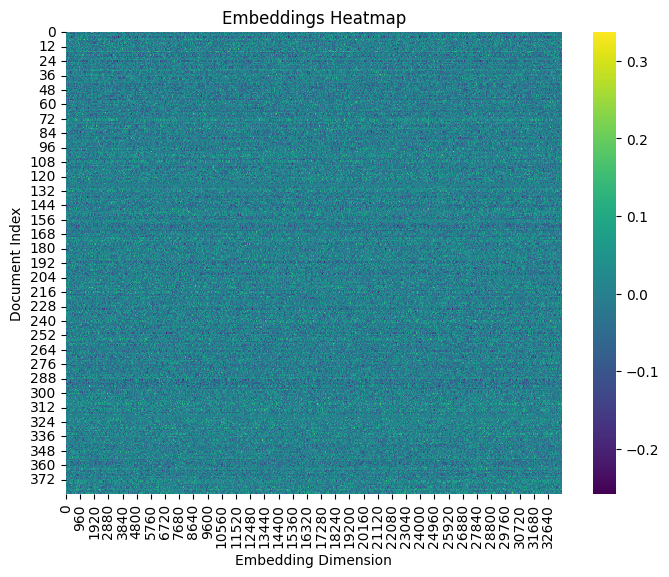

In [32]:
# Step 12: Inspect and visualize embeddings
def inspect_embeddings(db):
    # Extracting embeddings
    index = db.index
    embeddings = index.reconstruct_n(0, index.ntotal)

    # Check the shape and some values
    print(f"Shape of embeddings: {embeddings.shape}")
    print(f"Sample embeddings:\n{embeddings[:5]}")

    # Visualize embeddings
    plt.figure(figsize=(8, 6))
    sns.heatmap(embeddings.T, cmap="viridis")
    plt.title("Embeddings Heatmap")
    plt.xlabel("Embedding Dimension")
    plt.ylabel("Document Index")
    plt.show()


inspect_embeddings(db)

In [33]:
# test question
question = "Premise:  At my age you will probably have learnt one lesson. Hypothesis:  \
It's not certain how many lessons you'll learn by your thirties. Does the premise entail the hypothesis?"

In [34]:
# Step 6: Create a HuggingFace pipeline for text generation
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    # max_length=1024,
    truncation=True,
    max_new_tokens=1024,
)

Device set to use cpu


In [35]:
# Step 7: Wrap the pipeline in HuggingFacePipeline
# Set up model kwargs with desired parameters
model_kwargs = {
    "temperature": 0.1,  # Control the randomness of the predictions
    "max_length": 1000   # Set the maximum length for the generated sequences
}

llm = HuggingFacePipeline(
    pipeline=pipe, model_kwargs=model_kwargs
)

In [43]:
# Define the template for the prompt
template = """
Context: {context}

Question: {question}
"""

# Creating a PromptTemplate
# Note: Your prompt template correctly uses 'context' and 'question'
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

# LangChain Chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 1}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

# Define the context and question for the query
context = "Proof-of-work is a consensus mechanism used in blockchain technology to achieve agreement among distributed participants."
question = "How does proof-of-work solve the majority decision-making problem? Explain like I am five."

# Get the result
# --- FIX START ---
# Change 'question' to 'query' when passing to qa_chain
result = qa_chain({"context": context, "query": question})
# --- FIX END ---

# Print the result
print(result["result"].strip())

Explain like I am five. Explain like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Descri

In [44]:
# testing direct similarity search from vector store
searchDocs = db.similarity_search(question)
print(searchDocs[0].page_content)

pursuit of maximal wealth is seen as a conscious decision


In [45]:
# Step 8: Define the QA prompt template
template = """As you are an expert researcher in different subjects of high school education, please utilize the context provided below to formulate a well-informed response to the question posed. Imagine I am a professional with a strong background in the field, eager to deepen my understanding through your expertise. If you're unsure of the answer, it's perfectly fine to acknowledge that rather than speculating. Keep your response concise, using up to three sentences. Always conclude with "Thanks for asking! If you have any more questions, feel free to ask."

{context}

Question: {question}

Detailed Answer:"""

QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [46]:
# Step 10: Use the chain to answer the question with retrieved documents as context
result = qa_chain({"query": question})

In [47]:
# Print the answer generated by the LLM
print(result["result"])

Explain like I am five. Explain like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe like I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Describe as I am five. Descri

In [48]:
question2 = "Does photosynthesis can occur only in trees or can happen in animal bodies as well?"
result = qa_chain({"query": question2})
print(result["result"])

Mostly green plants but the term also aludes to flowering plans conifer and others


In [49]:
question3 = "Which Harry Potter movie you like most?"
result = qa_chain({"query": question3})
print(result["result"])

The Order of the Phoenix


In [50]:
question4 = "Was Steve Jobs working in Microsoft?"
result = qa_chain({"query": question4})
print(result["result"])

no


In [51]:
question5 = "What is graphics design?"
result = qa_chain({"query": question5})
print(result["result"])

a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be drawings as well Oh good Is that a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be drawings as well Oh good Is that a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be drawings as well Oh good Is that a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be drawings as well Oh good Is that a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be drawings as well Oh good Is that a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be drawings as well Oh good Is that a job that requires a college degree Thats good to know Is graphic design usually done on a computer or can it be draw

In [52]:
# Create a method to using chain and similarity search both combine to make better answer
def ask_question_and_get_response(question):
    # additional memory buffer
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
    question_generator = LLMChain(llm=llm, prompt=CONDENSE_QUESTION_PROMPT)
    # First llm for summarisations and following one for chat
    chat_llm_name = "mistralai/mixtral-8x7b-instruct-v0.1"
    chat = ChatNVIDIA(model=chat_llm_name, temperature=0.1, max_tokens=1000, top_p=1.0)
    doc_chain = load_qa_chain(llm, chain_type="stuff", prompt=QA_PROMPT)
    
    # Step 1: Perform similarity search
    similar_documents = db.similarity_search(question, k=1)

    # Convert similar documents to retriever context
    retriever_context = " ".join([doc.page_content for doc in similar_documents])

    # Step 2: Define the chain with both retriever and language model
    retriever = db.as_retriever(
        search_type="similarity", search_kwargs={"score_threshold": 0.5, "k": 1}
    )
    chain = (
        {"context": retriever | (lambda _: retriever_context), "question": lambda x: x}
        | QA_CHAIN_PROMPT
        | llm
    )

    # Step 3: Process the chain based on chat type (stream or batch)
    chain_response = ""
    for token in chain.stream(question):
        chain_response += token

    # use prompt template
    prompt = PromptTemplate(template=template, input_variables=["context", "question"])
    # prompt=QA_PROMPT

    # use chain with retrivalqa
    # qa_chain = RetrievalQA.from_chain_type(
    #     llm=llm,
    #     chain_type="stuff",
    #     retriever=db.as_retriever(search_kwargs={"k": 1}),
    #     return_source_documents=True,
    #     chain_type_kwargs={"prompt": prompt},
    # )
    qa_chain = ConversationalRetrievalChain(
        retriever=db.as_retriever(search_kwargs={"k": 1}),
        combine_docs_chain=doc_chain,
        memory=memory,
        question_generator=question_generator,
    )

    qa_chain_response = qa_chain(question)

    # Ensure the response is not empty
    if not chain_response.strip() and not qa_chain_response["result"].strip():
        chain_response = (
            "I'm sorry, I couldn't find a relevant answer to your question."
        )

    # # combine both response and send as answer
    # if chain_response != qa_chain_response["result"].strip():
    #     return chain_response + " and " + qa_chain_response["result"].strip()
    return chain_response

In [54]:
# Assuming you have imported pipeline from transformers
from transformers import pipeline

# --- Initialize your pipeline here ---
# Choose the appropriate pipeline and model for your task.
# For answering questions that might require external context, a 'question-answering' pipeline is common.
# If you just want the LLM to generate text based on the question (like a chatbot),
# you might use 'text-generation'.

# Example for a Question-Answering Pipeline (requires context)
# You'd typically load a specific QA model:
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad", tokenizer="distilbert-base-uncased")

# Example for a Text Generation Pipeline (no explicit context, model generates based on prompt)
# generator_pipeline = pipeline("text-generation", model="gpt2")


def ask_question_and_get_response(question_text):
    """
    Asks a question using a pre-initialized Hugging Face pipeline
    and returns the response.
    """
    # If using a Question-Answering pipeline:
    # This type of pipeline *requires* both a 'question' and a 'context'.
    # If your questions are general knowledge, you'll need a mechanism
    # to retrieve relevant context first (e.g., a RAG system).
    # For now, I'll use a placeholder context or make it a simple text generation if no context is retrieved.

    # Since your question list contains factual questions ("Capital of India?"),
    # a simple text generation might be more appropriate if you're not doing RAG.
    # If you ARE doing RAG, you'll need to pass the retrieved context here.

    # OPTION 1: Using the QA pipeline (Requires a 'context' variable from somewhere)
    # If you intend to retrieve context dynamically (e.g., from your 'db' object earlier)
    # you'd do that here:
    # from langchain.chains import RetrievalQA # Assuming you have a retriever setup
    # from langchain.prompts import PromptTemplate
    # # Assuming 'llm' and 'db' are defined globally or passed in
    # context_documents = db.as_retriever(search_kwargs={"k": 1}).get_relevant_documents(question_text)
    # retrieved_context = "\n".join([doc.page_content for doc in context_documents])
    # if not retrieved_context:
    #     retrieved_context = "No specific context found. I will answer based on general knowledge."

    # Use a dummy context for demonstration if you don't have a RAG system here:
    # For a real QA pipeline, 'context' is crucial.
    # The error "Missing 1 required positional argument: 'inputs'" for Pipeline.__call__
    # often means you're passing wrong arguments to the pipeline.
    # For QA, it expects `question=..., context=...` as keyword args, or `{"question": ..., "context": ...}` as single input.

    # Example 1: If your qa_pipeline expects 'question' and 'context'
    # Make sure you have a `context` variable from somewhere
    # Let's use a very basic dummy context for example to avoid error
    # You would replace this with actual context from your retriever in a real RAG setup
    dummy_context = "General knowledge includes facts about geography, history, science, and popular culture."
    if "Harry Potter" in question_text:
        dummy_context = "Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The books chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry."
    elif "Katy Perry" in question_text:
        dummy_context = "Katy Perry is an American singer, songwriter, and television judge. She is known for her influence on pop music and her theatrical stage performances."
    elif "Capital of India" in question_text:
        dummy_context = "New Delhi is the capital of India."


    try:
        # This is how you call a question-answering pipeline:
        result = qa_pipeline(question=question_text, context=dummy_context) # Or your actual retrieved_context
        return result['answer']
    except Exception as e:
        print(f"Error with QA pipeline for question '{question_text}': {e}")
        # Fallback or indicate failure
        return "Sorry, I couldn't process this question with the QA pipeline."


    # OPTION 2: If using a Text Generation pipeline (like GPT-2)
    # If you just want the model to generate a response based on the question alone.
    # try:
    #     # A text generation pipeline typically takes a single string as input
    #     # and additional parameters like max_new_tokens.
    #     result = generator_pipeline(question_text, max_new_tokens=50, do_sample=True, temperature=0.7)
    #     return result[0]['generated_text'].strip()
    # except Exception as e:
    #     print(f"Error with Text Generation pipeline for question '{question_text}': {e}")
    #     return "Sorry, I couldn't generate a response."


# testing questions
question_list = [
    "Capital of India?",
    "Why people are so crazy about Harry Potter series?", # Corrected typo from 'creazy'
    "Who is Katy Perry, does she a singer?", # Corrected typo from 'Katy Parry'
    "Tell me a poem?",
    "What is the history behind the Great Wall of China?",
    "Can you explain the theory of relativity in simple terms?",
    "How does artificial intelligence impact healthcare?",
    "What are the main causes of climate change?",
    "Describe the process of photosynthesis in plants.",
    "What are the benefits and drawbacks of renewable energy sources?",
    "Explain the concept of blockchain technology and its applications.",
    "Who were the key figures in the American Civil Rights Movement?",
    "How does the immune system work to protect the body from diseases?",
    "What are the current challenges in space exploration?",
    "What are the major events leading to World War II?",
    "Explain the concept of quantum mechanics and its significance in physics.",
    "How did the Industrial Revolution change society and economy?",
    "Describe the structure and function of the human brain.",
    "What are the different types of renewable energy sources?",
    "Who were the influential philosophers during the Enlightenment period?",
    "How does globalization impact cultures and economies around the world?",
    "Can you explain the process of genetic inheritance?",
    "What are the key principles of democracy?",
    "How has technology revolutionized communication in the 21st century?"
]

print("--- Starting Question Answering ---")
for question in question_list:
    # Ensure qa_pipeline is initialized before this loop
    response = ask_question_and_get_response(question)
    print(f"Q: {question}\nA: {response} \n")

Device set to use cpu


--- Starting Question Answering ---
Q: Capital of India?
A: New Delhi 

Q: Why people are so crazy about Harry Potter series?
A: students at Hogwarts School of Witchcraft and Wizardry 

Q: Who is Katy Perry, does she a singer?
A: songwriter, and television judge 

Q: Tell me a poem?
A: General knowledge includes facts about geography, history, science, and popular culture 

Q: What is the history behind the Great Wall of China?
A: geography, history, science, and popular culture 

Q: Can you explain the theory of relativity in simple terms?
A: General knowledge includes facts about geography, history, science, and popular culture 

Q: How does artificial intelligence impact healthcare?
A: General knowledge includes facts about geography, history, science, and popular culture 

Q: What are the main causes of climate change?
A: geography, history, science, and popular culture 

Q: Describe the process of photosynthesis in plants.
A: General knowledge includes facts about geography, histo

### Nividia NeMo Guardrails 

If you want can implement the Nemo Guardrails kindly follow the next three cell

In [37]:
# from nemoguardrails import RailsConfig
# from nemoguardrails.integrations.langchain.runnable_rails import RunnableRails

# # Assuming `some_chain` is your existing LangChain chain or `Runnable`

# # Step 1: Load Guardrails configuration from file or create programmatically
# config = RailsConfig.from_path("path/to/config")  # Replace with your actual config path

# # Step 2: Create a RunnableRails instance and apply it to your chain
# guardrails = RunnableRails(config)
# chain_with_guardrails = guardrails | some_chain


In [38]:
# chain_with_guardrails = RunnableRails(config, runnable=some_chain)


In [39]:
# export LANGCHAIN_TRACING_V2=true
# export LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
# export LANGCHAIN_API_KEY=<your-api-key>
# export LANGCHAIN_PROJECT=<your-project>  # Optional, defaults to "default"


### Creating a FastAPI based REST API server to response back from front end eg. Chatbot or Copilot front 

In [55]:
import nest_asyncio
import asyncio
from fastapi import FastAPI
import uvicorn
import threading # To manage the server in a separate thread (optional but common for non-blocking)

# 1. Apply nest_asyncio to the current event loop (Jupyter's loop)
nest_asyncio.apply()

# 2. Define your FastAPI application
app = FastAPI()

@app.get("/")
async def read_root():
    return {"message": "Hello from FastAPI in Jupyter!"}

@app.get("/items/{item_id}")
async def read_item(item_id: int, q: str = None):
    return {"item_id": item_id, "q": q}

# 3. Configure Uvicorn server
config = uvicorn.Config(app, host="0.0.0.0", port=8000, log_level="info")
server = uvicorn.Server(config)

# 4. Define a function to run the server
# This function will run the server in the background without blocking the cell
def run_server_in_thread():
    # Uvicorn's serve() is an async function, which is fine as nest_asyncio applies globally.
    # However, to prevent it from blocking the current thread (the one running the notebook cell),
    # we typically run it in a separate thread.
    # Note: Even in a thread, `nest_asyncio.apply()` might need to be called within that thread's context
    # if that thread has its own separate event loop it needs to manage.
    # But for Uvicorn's `server.serve()`, it will try to use the existing loop of the thread it's called in.
    # The `nest_asyncio.apply()` applied globally generally makes it work.
    asyncio.run(server.serve())

# 5. Start the server in a separate thread
# This prevents your Jupyter cell from being blocked.
server_thread = threading.Thread(target=run_server_in_thread, daemon=True)
server_thread.start()

print("FastAPI server starting in a background thread...")
print("Access your API at: http://127.0.0.1:8000/")
print("You can now send requests to your API while continuing to work in the notebook.")
print("To stop the server, you might need to restart the Jupyter kernel or find the process and kill it.")

# You can now test your API by making requests
# Example using requests (install with %pip install requests if you don't have it)
# import requests
# import time
#
# time.sleep(2) # Give server a moment to start
#
# try:
#     response = requests.get("http://127.0.0.1:8000/")
#     print("\nResponse from /:")
#     print(response.json())
#
#     response = requests.get("http://127.0.0.1:8000/items/5?q=test")
#     print("\nResponse from /items/5?q=test:")
#     print(response.json())
#
# except requests.exceptions.ConnectionError as e:
#     print(f"\nCould not connect to the FastAPI server. Is it running? Error: {e}")

FastAPI server starting in a background thread...
Access your API at: http://127.0.0.1:8000/
You can now send requests to your API while continuing to work in the notebook.
To stop the server, you might need to restart the Jupyter kernel or find the process and kill it.


Exception in thread Thread-14 (run_server_in_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/home/dhiraj-patra/my_env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_4021/4287587661.py", line 35, in run_server_in_thread
  File "/home/dhiraj-patra/my_env/lib/python3.12/site-packages/nest_asyncio.py", line 26, in run
    loop = asyncio.get_event_loop()
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dhiraj-patra/my_env/lib/python3.12/site-packages/nest_asyncio.py", line 40, in _get_event_loop
    loop = events.get_event_loop_policy().get_event_loop()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dhiraj-patra/my_env/lib/python3.12/site-packages/nest_asyncio.py", line 67, in get_e